## Установка зависимостей

In [ ]:
!pip install -U torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:46tcmalloc: large alloc 1147494400 bytes == 0x64c2a000 @  0x7f3f68b1a615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 6.9 kB/s 
     |████████████████████████████████| 24.3 MB 1.3 MB/s 
     |████████████████████████████████| 317.1 MB 30 kB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 557.1 MB 11 kB/s 
     |████████████████████████████████| 849 kB 64.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully unin

In [ ]:
# установка подходящей версии torch

#from os.path import exists
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
#platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
#cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
#accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
#import torch

In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Found existing installation: Pillow 7.1.2
Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.10 requires pillow>6.0.0, but you have pillow 5.3.0 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.


7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


## Код для скачивания датасэта с kaggle

Посмотрел https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166 здесь

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!kaggle competitions download -c journey-springfield -p /content/gdrive/My\ Drive/simpsons/data

 99% 515M/521M [00:09<00:00, 49.6MB/s]
100% 521M/521M [00:09<00:00, 58.5MB/s]


In [ ]:
!unzip -q journey-springfield.zip 

In [ ]:
!unzip -q /content/gdrive/My\ Drive/simpsons/data/dataset.zip -d train
!unzip -q /content/gdrive/My\ Drive/simpsons/data/testset.zip -d test

## Копирую с google drive датасэта в локальную среду

Это делаю для того, чтобы быстрее проходило обучение. В методе get_item вызывается метод load_sample, который подгружал фотографию с google drive. Увидел в группе сообщения о том, что если скопировать в локальную среду, то будет быстрее работать (видимо google drive тормозил)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/My Drive/simpsons/data

/content/gdrive/My Drive/simpsons/data


In [ ]:
%cp -av 'journey-springfield.zip' '/content/simpsons'

'journey-springfield.zip' -> '/content/simpsons/journey-springfield.zip'


In [ ]:
import os
os.chdir('/content/simpsons')  #change dir

In [ ]:
!unzip -q journey-springfield.zip 

## Продолжение

In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Thu Nov 17 05:02:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картинок, для которых вам будет необходимо предсказать класс.

In [ ]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val')

In [ ]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

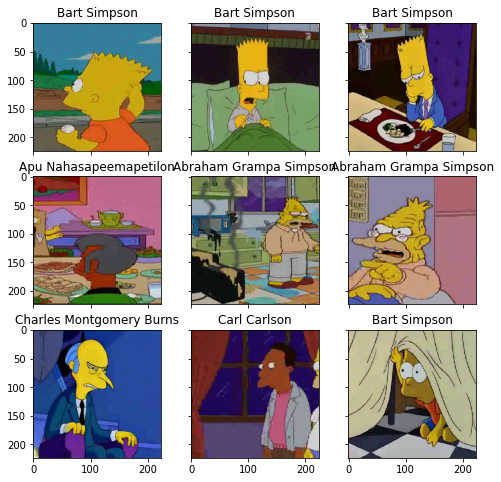

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

## Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (conv1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=2400, out_fea

Запустим обучение сети.

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=2, batch_size=64)

epoch:   0%|          | 0/2 [00:00<?, ?it/s]

loss 2.56635156453996


epoch:  50%|█████     | 1/2 [02:25<02:25, 145.39s/it]


Epoch 001 train_loss: 2.5664     val_loss 1.8799 train_acc 0.2908 val_acc 0.4904
loss 1.5179278086162584


epoch: 100%|██████████| 2/2 [04:47<00:00, 143.93s/it]


Epoch 002 train_loss: 1.5179     val_loss 1.2968 train_acc 0.5824 val_acc 0.6400


Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

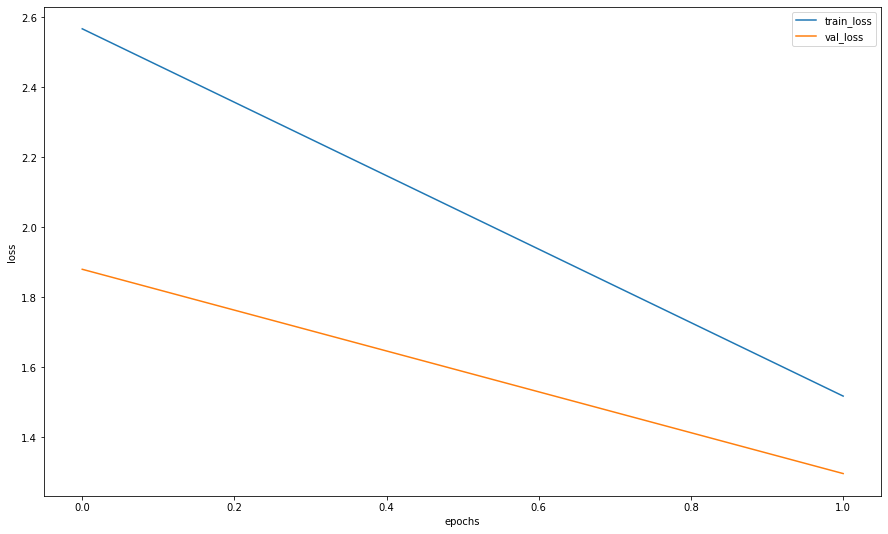

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
actual_labels

[4, 0, 0, 2, 3, 0, 4, 6, 4, 4, 6, 2, 0, 0, 4, 2, 4, 4, 0, 4]

In [ ]:
from sklearn.metrics import f1_score

f1_score(actual_labels, y_pred, average = 'micro')


0.45

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

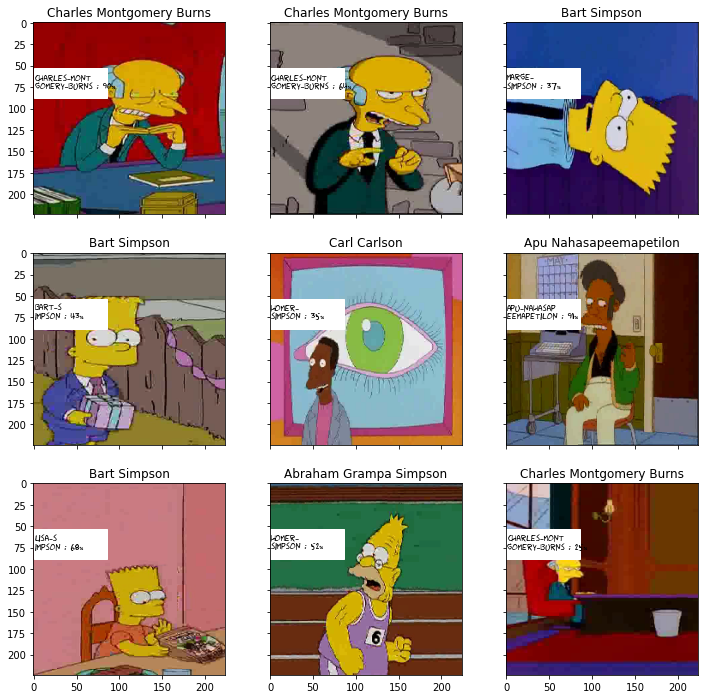

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

## Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(net, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(net2, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [ ]:
! ls 

characters_illustration.png  label_encoder.pkl	    testset
journey-springfield.zip      sample_submission.csv  train


In [ ]:
import pandas as pd
my_submit = pd.read_csv("sample_submission.csv")
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


In [ ]:
my_submit.to_csv('net_effnet_aug.csv', index=False)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)


# Методы, чтобы не запускать ячейки выше

Для того, чтобы каждый раз не запускать ячейки выше, запишем в одну клетку все нужные методы

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.cpu().numpy() / processed_size
    return val_loss, val_acc

def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

def train(train_files, val_files, model, epochs, batch_size, opt):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        #opt = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val') 
train_dataset = SimpsonsDataset(train_files, mode='train')

# Методы

Определим теперь класс SimpsonsDataset с добавление аугментации. Для того, чтобы попробовать разные аугментации и удобно сравнивать результаты, добавим в инициализацию датасэта функцию аугментации, которая будет выполнять аугментации на train элементах

In [ ]:
class SimpsonsDataset(Dataset):
    def __init__(self, files, mode, augmentation):
        super().__init__()
        self.files = sorted(files)
        self.mode = mode
        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError
        self.len_ = len(self.files)
        self.label_encoder = LabelEncoder()
        self.augmentation_transform = augmentation;
        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            if (self.mode == 'train'):
                x = self.augmentation_transform(x)
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(7)
])

In [ ]:
whole_train_dataset = SimpsonsDataset(train_val_files, mode='train', augmentation = aug_transform)

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val') 
train_dataset = SimpsonsDataset(train_files, mode='train')

# vgg16

In [ ]:
import torchvision
from torchvision import models, transforms

In [ ]:
net = models.vgg16(weights='IMAGENET1K_V1')
# так использую предобученную модель
# https://pytorch.org/vision/master/models/generated/torchvision.models.vgg16.html

In [ ]:
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
net.classifier[6] = nn.Linear(in_features=4096, out_features=42)

In [ ]:
for name, param in net.named_parameters():
  print(name)

features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.5.weight
features.5.bias
features.7.weight
features.7.bias
features.10.weight
features.10.bias
features.12.weight
features.12.bias
features.14.weight
features.14.bias
features.17.weight
features.17.bias
features.19.weight
features.19.bias
features.21.weight
features.21.bias
features.24.weight
features.24.bias
features.26.weight
features.26.bias
features.28.weight
features.28.bias
classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


## Обучаю только классификатор

попробуем сначала просто весь классификатор учить с одним learning rate, остальные слои не трогать

In [ ]:
learning_rates = [1e-4, 3e-4, 1e-3]

histories = []

for learning_rate in learning_rates:
  net = models.vgg16(weights='IMAGENET1K_V1')
  net.classifier[6] = nn.Linear(in_features=4096, out_features=42)

  params_to_update = []
  for name, param in net.named_parameters():
    if "classifier" in name:
      param.requires_grad = True
      params_to_update.append(param)
    else:
      param.requires_grad = False
      #print("without learning", name)

  optimizer = torch.optim.Adam([
      {'params': params_to_update, 'lr': learning_rate},
  ])

  net = net.to(DEVICE)

  print(f"Learning rate = {learning_rate}")

  history = train(train_dataset, val_dataset, model=net, epochs=5, batch_size=64, opt=optimizer)

  histories.append(history)

Learning rate = 0.0001


epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 1.9400079997377537


epoch:  20%|██        | 1/5 [04:15<17:03, 255.75s/it]


Epoch 001 train_loss: 1.9400     val_loss 1.1800 train_acc 0.4849 val_acc 0.6928
loss 0.5323591895396257


epoch:  40%|████      | 2/5 [08:30<12:45, 255.10s/it]


Epoch 002 train_loss: 0.5324     val_loss 0.7727 train_acc 0.8587 val_acc 0.7958
loss 0.05032767516304159


epoch:  60%|██████    | 3/5 [12:43<08:28, 254.09s/it]


Epoch 003 train_loss: 0.0503     val_loss 0.8109 train_acc 0.9924 val_acc 0.8017
loss 0.007694990591050125


epoch:  80%|████████  | 4/5 [16:55<04:13, 253.39s/it]


Epoch 004 train_loss: 0.0077     val_loss 0.7853 train_acc 0.9996 val_acc 0.8175
loss 0.003826189600186332


epoch: 100%|██████████| 5/5 [21:07<00:00, 253.49s/it]



Epoch 005 train_loss: 0.0038     val_loss 0.8011 train_acc 0.9997 val_acc 0.8189
Learning rate = 0.0003


epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 1.7981246884548479


epoch:  20%|██        | 1/5 [04:10<16:42, 250.57s/it]


Epoch 001 train_loss: 1.7981     val_loss 1.1040 train_acc 0.5225 val_acc 0.7083
loss 0.4453894222410661


epoch:  40%|████      | 2/5 [08:21<12:31, 250.66s/it]


Epoch 002 train_loss: 0.4454     val_loss 0.8482 train_acc 0.8804 val_acc 0.7851
loss 0.03846851380436206


epoch:  60%|██████    | 3/5 [12:31<08:20, 250.32s/it]


Epoch 003 train_loss: 0.0385     val_loss 0.9952 train_acc 0.9919 val_acc 0.7946
loss 0.007956129284332057


epoch:  80%|████████  | 4/5 [16:41<04:10, 250.32s/it]


Epoch 004 train_loss: 0.0080     val_loss 0.9190 train_acc 0.9990 val_acc 0.8181
loss 0.002751913351727685


epoch: 100%|██████████| 5/5 [20:51<00:00, 250.25s/it]



Epoch 005 train_loss: 0.0028     val_loss 0.8891 train_acc 0.9996 val_acc 0.8194
Learning rate = 0.001


epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 2.490242266534992


epoch:  20%|██        | 1/5 [04:09<16:39, 249.85s/it]


Epoch 001 train_loss: 2.4902     val_loss 1.5454 train_acc 0.3357 val_acc 0.6135
loss 0.8935356541981142


epoch:  40%|████      | 2/5 [08:20<12:31, 250.53s/it]


Epoch 002 train_loss: 0.8935     val_loss 0.9899 train_acc 0.7644 val_acc 0.7409
loss 0.1956560435300952


epoch:  60%|██████    | 3/5 [12:30<08:20, 250.04s/it]


Epoch 003 train_loss: 0.1957     val_loss 1.0112 train_acc 0.9452 val_acc 0.7677
loss 0.052073706233073926


epoch:  80%|████████  | 4/5 [16:37<04:09, 249.07s/it]


Epoch 004 train_loss: 0.0521     val_loss 1.3312 train_acc 0.9858 val_acc 0.7537
loss 0.0724487808003905


epoch: 100%|██████████| 5/5 [20:45<00:00, 249.12s/it]


Epoch 005 train_loss: 0.0724     val_loss 1.5867 train_acc 0.9803 val_acc 0.7415


In [ ]:
ax[0]

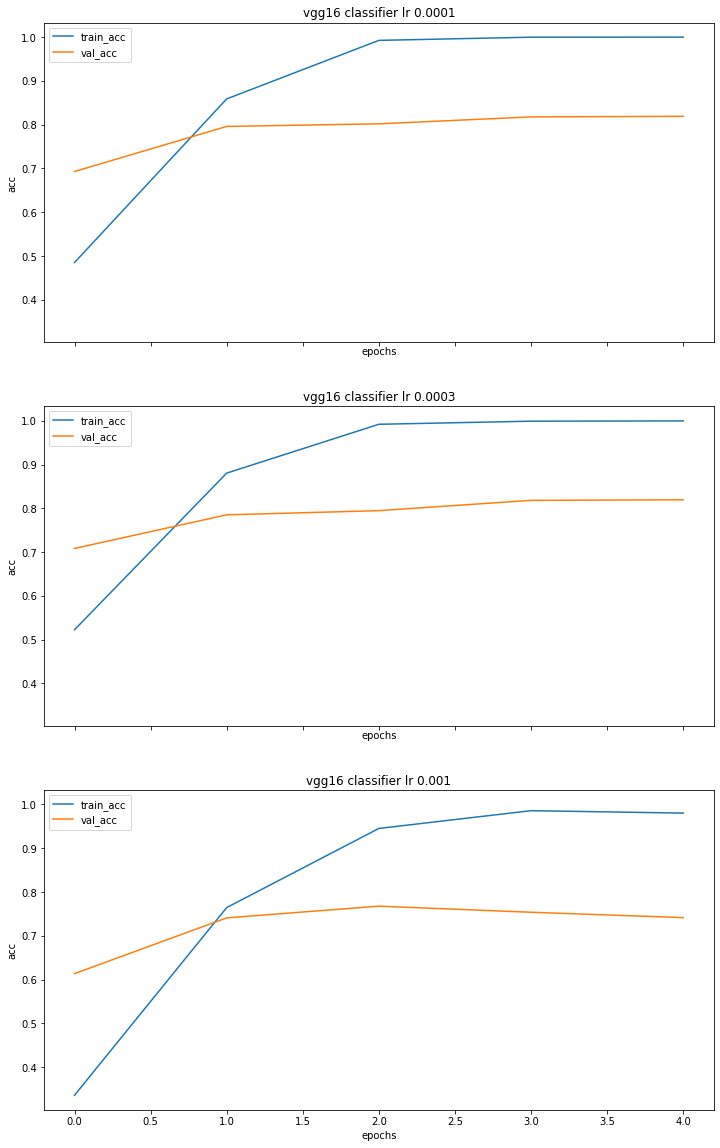

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(12, 20), \
                        sharey=True, sharex=True)
for i in range(3):
  loss, acc, val_loss, val_acc = zip(*histories[i])
  ax[i].set_title(f"vgg16 classifier lr {learning_rates[i]}")
  ax[i].plot(acc, label="train_acc")
  ax[i].plot(val_acc, label="val_acc")
  ax[i].legend(loc='best')
  ax[i].set_xlabel("epochs")
  ax[i].set_ylabel("acc")

увидели, что в каждом из случаев идет переобучение

## Обучаю классификатор и features

In [ ]:
learning_rates = [[1e-4, 3e-4], [3e-4, 8e-4], [1e-4, 1e-3]]

histories = []

for learning_rate in learning_rates:
  net = models.vgg16(weights='IMAGENET1K_V1')
  net.classifier[6] = nn.Linear(in_features=4096, out_features=42)

  params_to_update_classifier = []
  params_to_update_features = []
  for name, param in net.named_parameters():
    if "classifier" in name:
      param.requires_grad = True
      params_to_update_classifier.append(param)
    elif "features" in name:
      param.requires_grad = True
      params_to_update_features.append(param)
    else:
      param.requires_grad = False
      #print("without learning", name)

  optimizer = torch.optim.Adam([
      {'params': params_to_update_features, 'lr': learning_rate[0]},
      {'params': params_to_update_classifier, 'lr': learning_rate[1]},
  ])

  net = net.to(DEVICE)

  print(f"\n\n\nLearning rate for features = {learning_rate[0]}, for classifier = {learning_rate[1]}")

  history = train(train_dataset, val_dataset, model=net, epochs=8, batch_size=64, opt=optimizer)

  histories.append(history)




Learning rate for features = 0.0001, for classifier = 0.0003


epoch:   0%|          | 0/8 [00:00<?, ?it/s]

loss 1.125350241860703


epoch:  12%|█▎        | 1/8 [06:29<45:23, 389.00s/it]


Epoch 001 train_loss: 1.1254     val_loss 0.4616 train_acc 0.7062 val_acc 0.8886
loss 0.26620856680735805


epoch:  25%|██▌       | 2/8 [12:52<38:33, 385.63s/it]


Epoch 002 train_loss: 0.2662     val_loss 0.3160 train_acc 0.9318 val_acc 0.9230
loss 0.108587487037584


epoch:  38%|███▊      | 3/8 [19:15<32:02, 384.44s/it]


Epoch 003 train_loss: 0.1086     val_loss 0.3259 train_acc 0.9693 val_acc 0.9232
loss 0.08562918536185163


epoch:  50%|█████     | 4/8 [25:38<25:35, 383.78s/it]


Epoch 004 train_loss: 0.0856     val_loss 0.3829 train_acc 0.9764 val_acc 0.9079
loss 0.05774456483130243


epoch:  62%|██████▎   | 5/8 [31:58<19:08, 382.74s/it]


Epoch 005 train_loss: 0.0577     val_loss 0.4363 train_acc 0.9839 val_acc 0.9194
loss 0.051800014810948


epoch:  75%|███████▌  | 6/8 [38:21<12:45, 382.83s/it]


Epoch 006 train_loss: 0.0518     val_loss 0.3818 train_acc 0.9857 val_acc 0.9324
loss 0.044620568669317524


epoch:  88%|████████▊ | 7/8 [44:42<06:21, 381.97s/it]


Epoch 007 train_loss: 0.0446     val_loss 0.2928 train_acc 0.9886 val_acc 0.9448
loss 0.046907838775418424


epoch: 100%|██████████| 8/8 [51:02<00:00, 382.83s/it]



Epoch 008 train_loss: 0.0469     val_loss 0.7377 train_acc 0.9885 val_acc 0.8603



Learning rate for features = 0.0003, for classifier = 0.0008


epoch:   0%|          | 0/8 [00:00<?, ?it/s]

loss 2.260574759977761


epoch:  12%|█▎        | 1/8 [06:20<44:24, 380.63s/it]


Epoch 001 train_loss: 2.2606     val_loss 1.3092 train_acc 0.3570 val_acc 0.6477
loss 0.8556651895126269


epoch:  25%|██▌       | 2/8 [13:58<42:34, 425.81s/it]


Epoch 002 train_loss: 0.8557     val_loss 0.5943 train_acc 0.7795 val_acc 0.8493
loss 0.5335605590975553


epoch:  38%|███▊      | 3/8 [23:26<40:55, 491.08s/it]


Epoch 003 train_loss: 0.5336     val_loss 0.7068 train_acc 0.8552 val_acc 0.8326
loss 0.36393283306698077


epoch:  50%|█████     | 4/8 [32:57<34:50, 522.67s/it]


Epoch 004 train_loss: 0.3639     val_loss 0.4484 train_acc 0.9004 val_acc 0.8856
loss 0.2967209469642569


epoch:  62%|██████▎   | 5/8 [42:35<27:07, 542.35s/it]


Epoch 005 train_loss: 0.2967     val_loss 0.3924 train_acc 0.9194 val_acc 0.8991
loss 0.21693241999433166


epoch:  75%|███████▌  | 6/8 [51:38<18:05, 542.68s/it]


Epoch 006 train_loss: 0.2169     val_loss 0.5312 train_acc 0.9397 val_acc 0.8867
loss 0.2057277529703134


epoch:  88%|████████▊ | 7/8 [59:18<08:35, 515.76s/it]


Epoch 007 train_loss: 0.2057     val_loss 0.4761 train_acc 0.9452 val_acc 0.8947
loss 0.16148287910903758


epoch: 100%|██████████| 8/8 [1:06:59<00:00, 502.48s/it]



Epoch 008 train_loss: 0.1615     val_loss 0.4654 train_acc 0.9562 val_acc 0.9016



Learning rate for features = 0.0001, for classifier = 0.001


epoch:   0%|          | 0/8 [00:00<?, ?it/s]

loss 1.6524236100336132


epoch:  12%|█▎        | 1/8 [07:45<54:17, 465.32s/it]


Epoch 001 train_loss: 1.6524     val_loss 0.8188 train_acc 0.5611 val_acc 0.7768
loss 0.5079064159110379


epoch:  25%|██▌       | 2/8 [15:39<47:01, 470.31s/it]


Epoch 002 train_loss: 0.5079     val_loss 0.4082 train_acc 0.8720 val_acc 0.8974
loss 0.19410267521719377


epoch:  38%|███▊      | 3/8 [24:25<41:19, 495.89s/it]


Epoch 003 train_loss: 0.1941     val_loss 0.3896 train_acc 0.9486 val_acc 0.9136
loss 0.12231293250784384


epoch:  50%|█████     | 4/8 [33:13<33:54, 508.67s/it]


Epoch 004 train_loss: 0.1223     val_loss 0.4763 train_acc 0.9681 val_acc 0.8936
loss 0.10357047631910435


epoch:  62%|██████▎   | 5/8 [42:01<25:46, 515.59s/it]


Epoch 005 train_loss: 0.1036     val_loss 0.3758 train_acc 0.9738 val_acc 0.9245
loss 0.07467934845931214


epoch:  75%|███████▌  | 6/8 [50:47<17:18, 519.15s/it]


Epoch 006 train_loss: 0.0747     val_loss 0.5532 train_acc 0.9814 val_acc 0.9047
loss 0.11580589282537533


epoch:  88%|████████▊ | 7/8 [57:49<08:07, 487.40s/it]


Epoch 007 train_loss: 0.1158     val_loss 0.4548 train_acc 0.9716 val_acc 0.9157
loss 0.075041229004717


epoch: 100%|██████████| 8/8 [1:04:48<00:00, 486.08s/it]


Epoch 008 train_loss: 0.0750     val_loss 0.5364 train_acc 0.9830 val_acc 0.8999


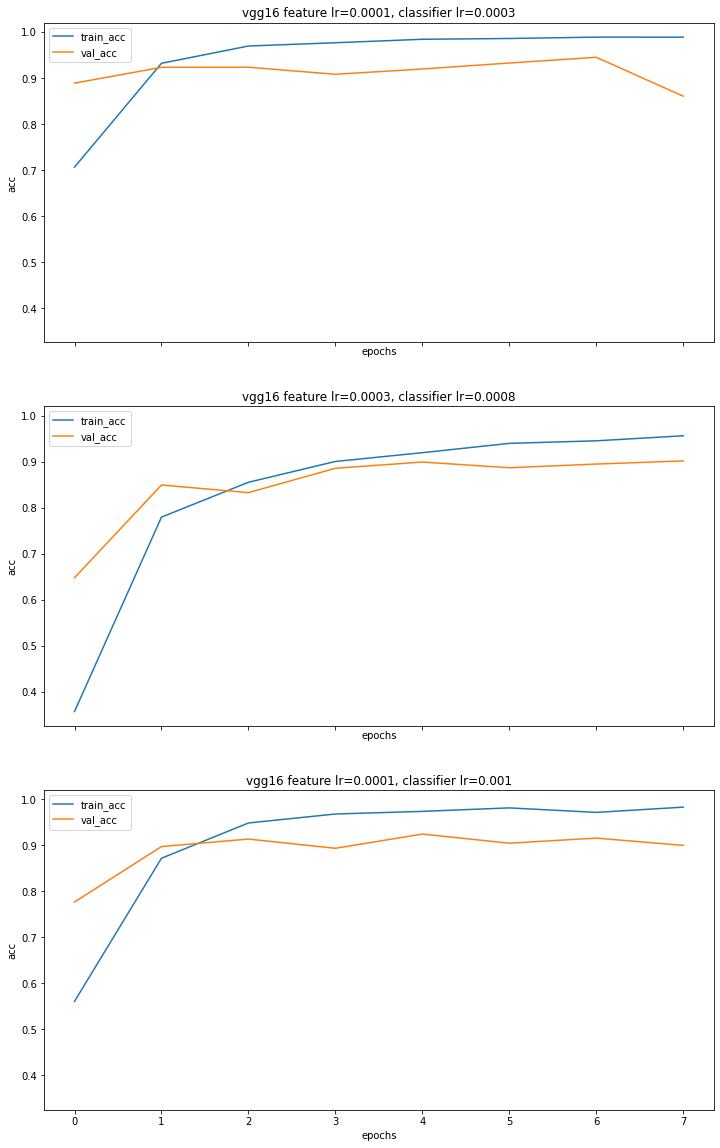

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(12, 20), \
                        sharey=True, sharex=True)
for i in range(3):
  loss, acc, val_loss, val_acc = zip(*histories[i])
  ax[i].set_title(f"vgg16 feature lr={learning_rates[i][0]}, classifier lr={learning_rates[i][1]}")
  ax[i].plot(acc, label="train_acc")
  ax[i].plot(val_acc, label="val_acc")
  ax[i].legend(loc='best')
  ax[i].set_xlabel("epochs")
  ax[i].set_ylabel("acc")

https://www.kaggle.com/code/saekiryosuke/fine-tuned-classifier-with-vgg16-and-pytorch/notebook
попробуем взять такое

In [ ]:
# setting fine tuned parameters

params_to_update_1 = []
params_to_update_2 = []
params_to_update_3 = []

# Not only output layer, "features" layers and other classifier layers are tuned.
update_param_names_1 = ["features"]
update_param_names_2 = ["classifier.0.weight",
                        "classifier.0.bias", "classifier.3.weight", "classifier.3.bias"]
update_param_names_3 = ["classifier.6.weight", "classifier.6.bias"]

# store parameters in list
for name, param in net.named_parameters():
    if update_param_names_1[0] in name:
        param.requires_grad = True
        params_to_update_1.append(param)
        #print("params_to_update_1:", name)

    elif name in update_param_names_2:
        param.requires_grad = True
        params_to_update_2.append(param)
        #print("params_to_update_2:", name)

    elif name in update_param_names_3:
        param.requires_grad = True
        params_to_update_3.append(param)
        #print("params_to_update_3:", name)

    else:
        param.requires_grad = False
        #print("no learning", name)

# print("-----------")
# print(params_to_update_1)

# Learning Rates
optimizer = torch.optim.Adam([
    {'params': params_to_update_1, 'lr': 1e-4},
    {'params': params_to_update_2, 'lr': 5e-4},
    {'params': params_to_update_3, 'lr': 1e-3}
])

In [ ]:
optimizer = torch.optim.Adam(net.parameters(),lr=0.0003)

In [ ]:
net = net.to(DEVICE)

In [ ]:
history = train(train_dataset, val_dataset, model=net, epochs=5, batch_size=64, opt=optimizer)

epoch:   0%|          | 0/5 [00:43<?, ?it/s]


TypeError: ignored

In [ ]:
whole_train_dataset = SimpsonsDataset(train_val_files, mode='train')

In [ ]:
def train_whole(train_files, model, epochs, batch_size, opt):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    train_acc {t_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        #opt = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            history.append((train_loss, train_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           t_acc=train_acc))
            
    return history

In [ ]:
history = train_whole(whole_train_dataset, model=net, epochs=13, batch_size=64, opt=optimizer)

epoch:   8%|▊         | 1/13 [02:19<27:54, 139.51s/it]

loss 1.2857063856075293

Epoch 001 train_loss: 1.2857     train_acc 0.6669


epoch:  15%|█▌        | 2/13 [04:39<25:35, 139.61s/it]

loss 0.38797021558466394

Epoch 002 train_loss: 0.3880     train_acc 0.9004


epoch:  23%|██▎       | 3/13 [07:01<23:27, 140.80s/it]

loss 0.218172935446597

Epoch 003 train_loss: 0.2182     train_acc 0.9439


epoch:  31%|███       | 4/13 [09:23<21:13, 141.46s/it]

loss 0.11649690069557875

Epoch 004 train_loss: 0.1165     train_acc 0.9696


epoch:  38%|███▊      | 5/13 [11:46<18:54, 141.78s/it]

loss 0.10011022713604141

Epoch 005 train_loss: 0.1001     train_acc 0.9749


epoch:  46%|████▌     | 6/13 [14:09<16:37, 142.44s/it]

loss 0.11134867260425044

Epoch 006 train_loss: 0.1113     train_acc 0.9736


epoch:  54%|█████▍    | 7/13 [16:33<14:16, 142.80s/it]

loss 0.05992099913904752

Epoch 007 train_loss: 0.0599     train_acc 0.9850


epoch:  62%|██████▏   | 8/13 [18:57<11:56, 143.31s/it]

loss 0.07036165360908406

Epoch 008 train_loss: 0.0704     train_acc 0.9841


epoch:  69%|██████▉   | 9/13 [21:22<09:34, 143.65s/it]

loss 0.04335176655540394

Epoch 009 train_loss: 0.0434     train_acc 0.9897


epoch:  77%|███████▋  | 10/13 [23:46<07:11, 143.73s/it]

loss 0.02334241603932135

Epoch 010 train_loss: 0.0233     train_acc 0.9955


epoch:  77%|███████▋  | 10/13 [24:05<07:13, 144.51s/it]


KeyboardInterrupt: ignored

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        aug_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(7)
        ])
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            x = aug_transform(x)
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
!pip install efficientnet_pytorch

from efficientnet_pytorch import EfficientNet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=00cd518c5e32be98e0c807097f00363ef4b5075b3e76536e346e19ef77be89ec
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
net2 = EfficientNet.from_pretrained('efficientnet-b3')

Loaded pretrained weights for efficientnet-b3


In [ ]:
net2

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [ ]:
net2._fc = nn.Linear(in_features=1536, out_features=42)

In [ ]:
net2

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [ ]:
optimizer = torch.optim.Adam(net2.parameters(),lr=0.0003)

In [ ]:
net2 = net2.to(DEVICE)

In [ ]:
history = train_whole(whole_train_dataset, model=net2, epochs=10, batch_size=64, opt=optimizer)

epoch:  10%|█         | 1/10 [02:23<21:31, 143.48s/it]

loss 0.7411930639183106

Epoch 001 train_loss: 0.7412     train_acc 0.8427


epoch:  20%|██        | 2/10 [04:47<19:08, 143.52s/it]

loss 0.09894485195563704

Epoch 002 train_loss: 0.0989     train_acc 0.9776


epoch:  30%|███       | 3/10 [07:10<16:44, 143.51s/it]

loss 0.04248464062712179

Epoch 003 train_loss: 0.0425     train_acc 0.9897


epoch:  40%|████      | 4/10 [09:34<14:21, 143.50s/it]

loss 0.02528247462475345

Epoch 004 train_loss: 0.0253     train_acc 0.9941


epoch:  50%|█████     | 5/10 [11:57<11:57, 143.53s/it]

loss 0.024701322320453252

Epoch 005 train_loss: 0.0247     train_acc 0.9936


epoch:  60%|██████    | 6/10 [14:21<09:34, 143.52s/it]

loss 0.014938620943226087

Epoch 006 train_loss: 0.0149     train_acc 0.9960


epoch:  70%|███████   | 7/10 [16:45<07:11, 143.95s/it]

loss 0.016926441020919877

Epoch 007 train_loss: 0.0169     train_acc 0.9953


epoch:  80%|████████  | 8/10 [19:09<04:47, 143.95s/it]

loss 0.016707338823661797

Epoch 008 train_loss: 0.0167     train_acc 0.9959


epoch:  90%|█████████ | 9/10 [21:36<02:24, 144.76s/it]

loss 0.017279968631046673

Epoch 009 train_loss: 0.0173     train_acc 0.9953


epoch: 100%|██████████| 10/10 [24:00<00:00, 144.08s/it]

loss 0.016107971831427412

Epoch 010 train_loss: 0.0161     train_acc 0.9956
